In [ ]:
import wrangle as w
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
telco_df = w.get_telco_data()


In [41]:
reload(w)

<module 'wrangle' from '/Users/woody/codeup-data-science/project-1/wrangle.py'>

In [32]:

train, validate, test = w.prep_telco(telco_df)


In [33]:
train.gender.value_counts().sort_index()

0    1936
1    2007
Name: gender, dtype: int64

In [37]:
telco_df.phone_service.value_counts()

Yes    6361
No      682
Name: phone_service, dtype: int64

ValueError: num must be 1 <= num <= 14, not 24

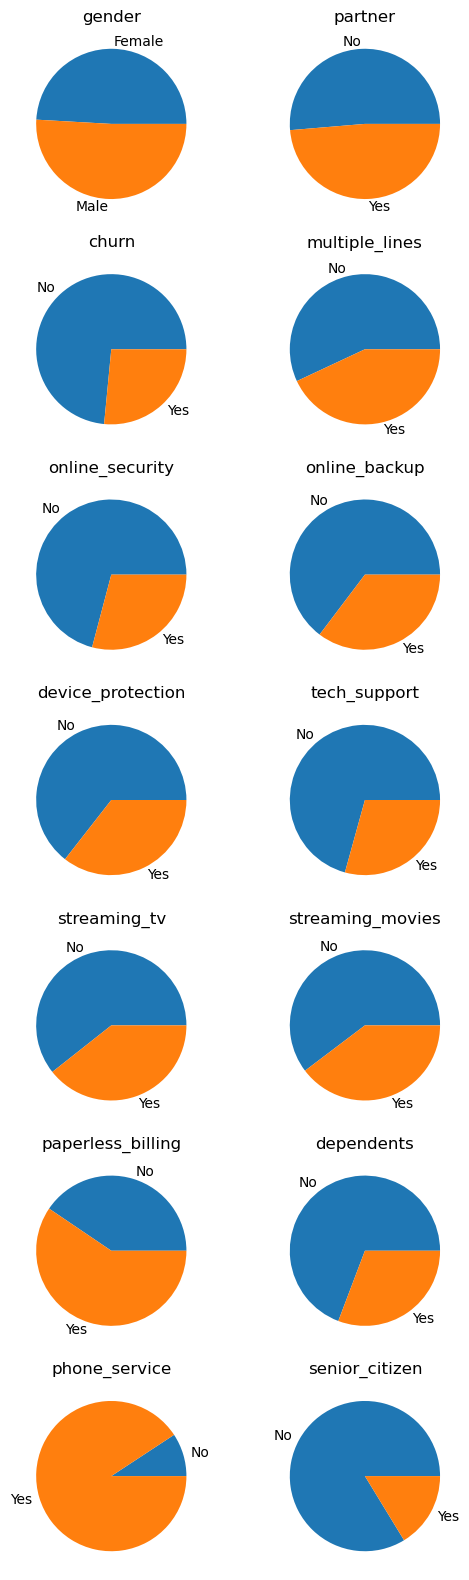

In [50]:
categorical = w.CAT_COLS + ['senior_citizen']
plt.figure(figsize=(6,20))
plt.subplot(8,2,1)
plt.title('gender')
plt.pie(train['gender'].value_counts().sort_index(),labels=['Female','Male'])
for i,col in enumerate(categorical):
       plt.subplot(8,2,i+2)
       plt.title(col)
       plt.pie(train[col].value_counts().sort_index(), labels=['No','Yes'])
plt.subplot(8,2,15)
plt.title('Internet Service Type')
plt.pie(train.internet_service_type.value_counts().sort_index(), labels=w.IST_KEY)
plt.subplot(8,2,1)
plt.title('Payment Type')
plt.pie(train.payment_type.value_counts().sort_index(), labels= w.PAYMENT_KEY)



In [ ]:
features = ['tenure','monthly_charges','total_charges','churn']
for i,col in enumerate(features):
    plt.subplot(4,1,i+1)
    sns.histplot(data=train[col])

## Takeaways
customers who churn tend to have higher monthly charges and shorter tenure


In [ ]:
sns.pairplot(data=train[features],hue='churn')

In [ ]:
plt.figure(figsize=(10,20))
sbplt = len(categorical) //2 +1
for col,cat in enumerate(categorical):
    plt.subplot(sbplt,2,col+1)
    sns.barplot(x=train[cat], y=)

([<matplotlib.patches.Wedge at 0x7f8861e88d30>,
 [Text(0.19743494849724053, 1.0821365168553791, ''),
  Text(-0.8314027125759733, -0.7202565720084155, ''),
  Text(0.8577854188494288, -0.6886248435899696, '')])

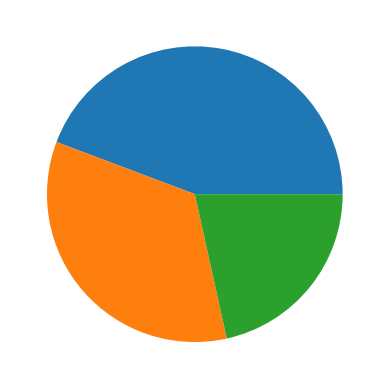

In [39]:
plt.pie(train.internet_service_type.value_counts())